In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('./Nombre de pannes par jour.csv',sep=",")

In [2]:
df.head()

,Count of Ordre de travail,Year,Month,Day,Earliest Date
0,5,2019,January,1,2019-01-01 00:00:00
1,2,2019,January,2,2019-01-02 00:00:00
2,3,2019,January,3,2019-01-03 00:00:00
3,5,2019,January,4,2019-01-04 00:00:00
4,2,2019,January,5,2019-01-05 00:00:00


In [3]:
df = df.drop('Year', axis=1)
df = df.drop('Month', axis=1)
df = df.drop('Day', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Count of Ordre de travail  838 non-null    int64 
 1   Earliest Date              838 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.2+ KB


In [5]:
df['Earliest Date'] = pd.to_datetime(df['Earliest Date'])

In [6]:
df.head()

,Count of Ordre de travail,Earliest Date
0,5,2019-01-01
1,2,2019-01-02
2,3,2019-01-03
3,5,2019-01-04
4,2,2019-01-05


In [7]:
df.tail()

,Count of Ordre de travail,Earliest Date
833,1,2022-03-03
834,1,2022-03-04
835,2,2022-03-07
836,3,2022-03-08
837,3,2022-03-09


In [8]:
df.to_csv('./Nombre_de_pannes_pfc1.csv', index=False,sep=";") 

In [9]:
df=pd.read_csv('./Nombre_de_pannes_pfc1.csv',sep=";",index_col="Earliest Date", parse_dates=True)

In [10]:
df.head()

,Count of Ordre de travail
Earliest Date,
2019-01-01,5
2019-01-02,2
2019-01-03,3
2019-01-04,5
2019-01-05,2


In [11]:
df=df.asfreq("D")
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Earliest Date', length=1164, freq='D')

In [12]:
df=df.fillna(0)

In [13]:
df.to_csv('./Nombre_de_pannes_pfc1.csv', index=True,sep=";") 

In [14]:
df=pd.read_csv('./Nombre_de_pannes_pfc1.csv',sep=";",index_col="Earliest Date", parse_dates=True)

In [15]:
df.tail()

,Count of Ordre de travail
Earliest Date,
2022-03-05,0.0
2022-03-06,0.0
2022-03-07,2.0
2022-03-08,3.0
2022-03-09,3.0


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

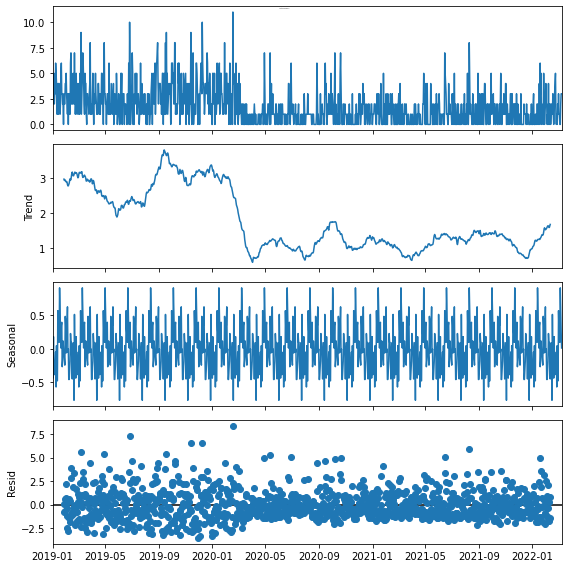

In [17]:
y = df['Count of Ordre de travail'].to_frame()

result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (8,8)})
result_add.plot().suptitle('Additive Decompose', fontsize=1)
plt.show()

In [18]:
msk=(df.index <'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

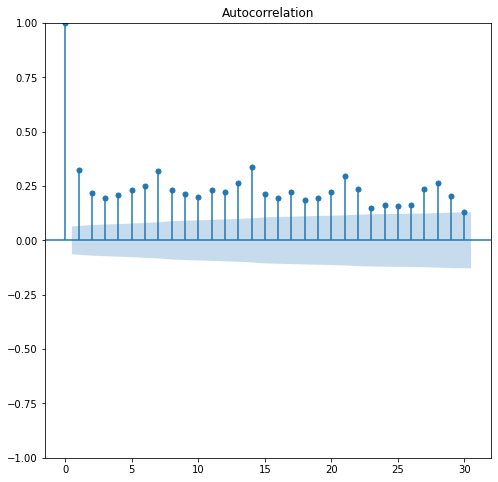

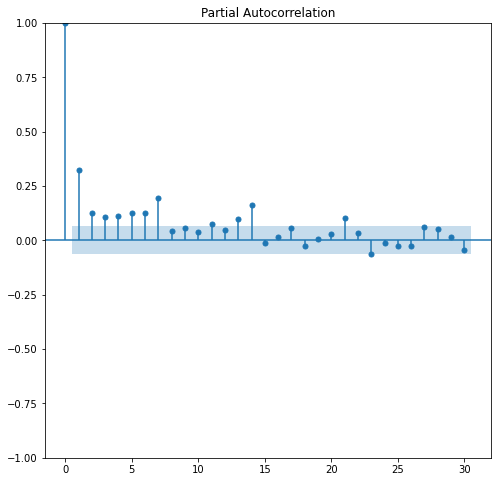

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [20]:
from statsmodels.tsa.stattools import adfuller #ADF TEST palue below 0.05 
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.10620254300532078


In [21]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(6,1,6))
model_fit = model.fit()


C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Earliest Date'>

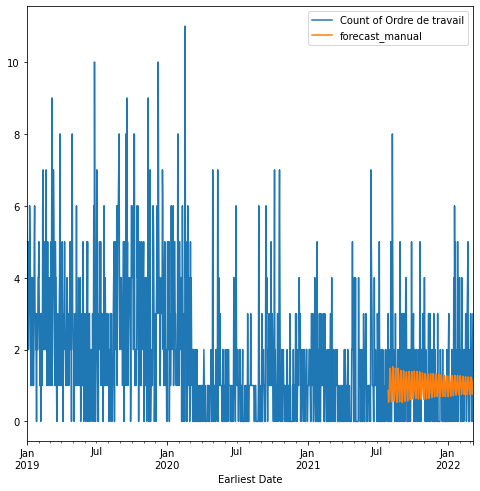

In [22]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
r2= r2_score(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'r2 - manual: {r2}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.048818905789645
r2 - manual: -0.0014062850475600186
rmse - manual: 1.4209870891859469


In [24]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

<AxesSubplot:xlabel='Earliest Date'>

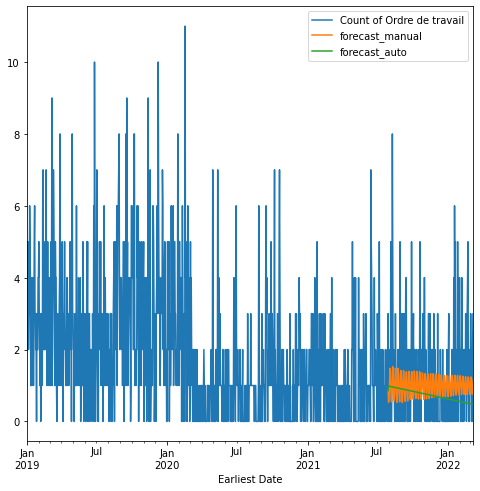

In [25]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [26]:
mae = mean_absolute_error(df_test, forecast_test_auto)
r2= r2_score(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'r2 - auto: {r2}')
print(f'rmse - auto: {rmse}')

mae - auto: 1.1100944785614184
r2 - auto: -0.17514225434219077
rmse - auto: 1.5393245536238067


In [27]:
sarima= pm.auto_arima(df_train, m=7)

<AxesSubplot:xlabel='Earliest Date'>

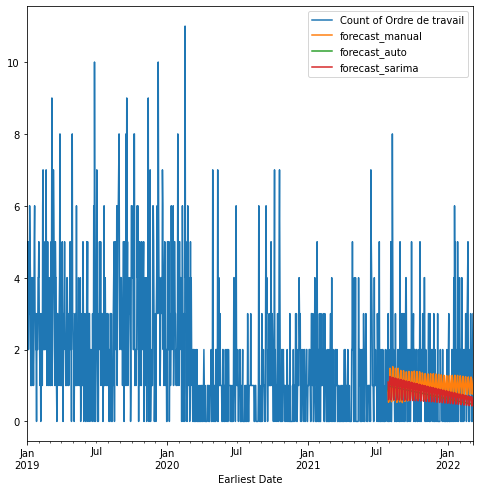

In [28]:
forecast_sarima = sarima.predict(n_periods=len(df_test))
df['forecast_sarima'] = [None]*len(df_train) + list(forecast_sarima)

df.plot()

In [29]:
mae = mean_absolute_error(df_test, forecast_sarima)
r2= r2_score(df_test, forecast_sarima)
rmse = np.sqrt(mean_squared_error(df_test, forecast_sarima))

print(f'mae - sarima: {mae}')
print(f'r2 -  sarima: {r2}')
print(f'rmse - sarima: {rmse}')

mae - sarima: 1.0590058247021075
r2 -  sarima: -0.08333530166230929
rmse - sarima: 1.477972737863872


In [30]:
x_train=df_train.drop(['Count of Ordre de travail'], axis=1)

In [31]:
x_test=df_test.drop(['Count of Ordre de travail'], axis=1)

In [32]:
y_train=df_train['Count of Ordre de travail']

In [33]:
y_test=df_test['Count of Ordre de travail']

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses= SimpleExpSmoothing(np.asarray(y_train))

In [35]:
ses_fit=ses.fit(optimized=True)
y_pred= ses_fit.forecast(len(df_test))

In [36]:
df.head()

,Count of Ordre de travail,forecast_manual,forecast_auto,forecast_sarima
Earliest Date,,,,
2019-01-01,5.0,NaN,NaN,NaN
2019-01-02,2.0,NaN,NaN,NaN
2019-01-03,3.0,NaN,NaN,NaN
2019-01-04,5.0,NaN,NaN,NaN
2019-01-05,2.0,NaN,NaN,NaN


In [37]:
df = df.drop('forecast_manual', axis=1)
df = df.drop('forecast_auto', axis=1)
df = df.drop('forecast_sarima', axis=1)

In [38]:
df['forecast_ses'] = [None]*len(df_train) + list(y_pred)

<AxesSubplot:xlabel='Earliest Date'>

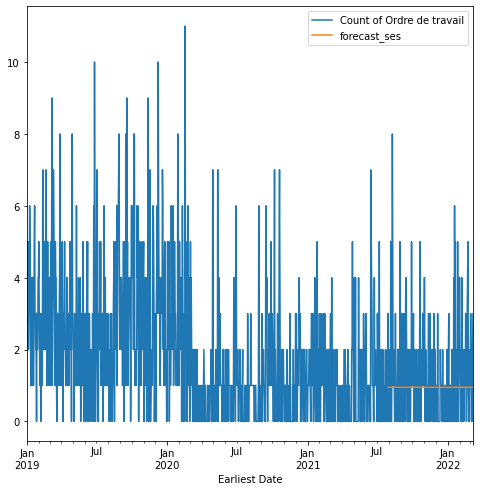

In [39]:
df.plot()


In [40]:
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score( y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'mae - ses: {mae}')
print(f'r2 - ses: {r2}')
print(f'rmse - ses: {rmse}')

mae - ses: 1.0495429650059824
r2 - ses: -0.06405475209377287
rmse - ses: 1.4647616587159262


In [41]:
df=pd.read_csv('./Nombre_de_pannes_pfc1.csv',sep=";", parse_dates=True)

df['Earliest Date'] = pd.to_datetime(df['Earliest Date'])
msk=(df['Earliest Date']<'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

In [42]:
df.head()

,Earliest Date,Count of Ordre de travail
0,2019-01-01,5.0
1,2019-01-02,2.0
2,2019-01-03,3.0
3,2019-01-04,5.0
4,2019-01-05,2.0


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
x_train=df_train.drop(['Count of Ordre de travail'], axis=1)
x_test=df_test.drop(['Count of Ordre de travail'], axis=1)
y_train=df_train['Count of Ordre de travail']
y_test=df_test['Count of Ordre de travail']

In [45]:
rfr=RandomForestRegressor(random_state=7)

In [46]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=7)

In [47]:
y_pred=rfr.predict(x_test)

<AxesSubplot:xlabel='Earliest Date'>

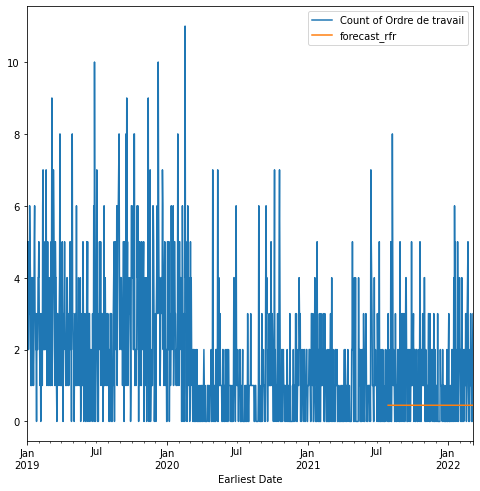

In [48]:
df['forecast_rfr'] = [None]*len(df_train) + list(y_pred)
df.index = df['Earliest Date']
del df['Earliest Date']
df.plot()

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
r2= r2_score( y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'mae - rfr: {mae}')
print(f'r2 - rfr: {r2}')
print(f'rmse - rfr: {rmse}')

mae - rfr: 1.1863228699551573
r2 - rfr: -0.36630088658847915
rmse - rfr: 1.6598091359288885


In [50]:
df=df.asfreq("D")
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Earliest Date', length=1164, freq='D')

In [51]:
df=pd.read_csv('./Nombre_de_pannes_pfc1.csv', encoding='latin-1',sep=";",index_col="Earliest Date", parse_dates=True)
df=df.asfreq("D")
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Earliest Date', length=1164, freq='D')

In [52]:
df.head()

,Count of Ordre de travail
Earliest Date,
2019-01-01,5.0
2019-01-02,2.0
2019-01-03,3.0
2019-01-04,5.0
2019-01-05,2.0


In [53]:
df=df.fillna(0)

In [54]:
df = df.rename(columns={'Earliest Date': 'Date début', 'Count of Ordre de travail': 'Number of Orders'})

In [55]:
df.insert(0,'null','')
df['null'] = 0

In [56]:
df.head()

,null,Number of Orders
Earliest Date,,
2019-01-01,0,5.0
2019-01-02,0,2.0
2019-01-03,0,3.0
2019-01-04,0,5.0
2019-01-05,0,2.0


In [57]:
msk=(df.index<'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

In [58]:
x_train=df_train.drop(['Number of Orders'], axis=1)
x_test=df_test.drop(['Number of Orders'], axis=1)
y_train=df_train[['Number of Orders']]
y_test=df_test[['Number of Orders']]

In [59]:
from xgboost import XGBRegressor
xg_reg=XGBRegressor()
xg_fit=xg_reg.fit(x_train, y_train)

<AxesSubplot:xlabel='Earliest Date'>

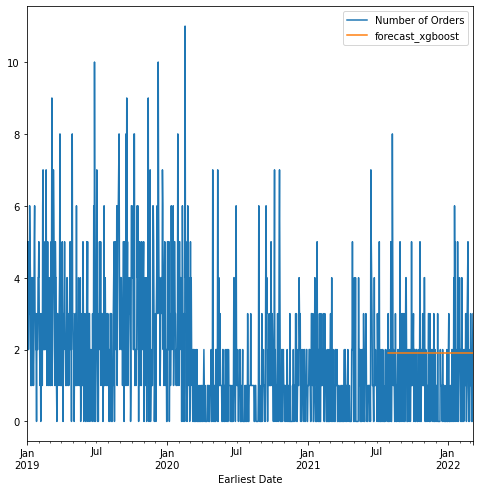

In [60]:
 y_pred=xg_fit.predict(x_test)
df['forecast_xgboost'] = [None]*len(df_train) + list(y_pred)
df = df.drop('null', axis=1)
df.plot()

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
r2= r2_score( y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'mae - xg: {mae}')
print(f'r2 - xg: {r2}')
print(f'rmse - xg: {rmse}')

mae - xg: 1.2832546260859399
r2 - xg: -0.175540139262224
rmse - xg: 1.5395851272649497
